# Import all necessery Libary

In [0]:
import math
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# read the data



In [0]:
data=pd.read_csv('train.csv',header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,c,l
1,e,k,s,g,f,n,f,w,b,p,e,?,s,s,w,w,p,w,t,p,w,s,g
2,e,b,s,g,f,n,f,w,b,w,e,?,s,s,w,w,p,w,t,p,w,s,g
3,e,s,f,g,f,n,f,c,n,n,e,e,s,s,w,w,p,w,o,p,n,v,u
4,e,f,f,g,f,n,f,w,b,p,t,e,s,f,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4491,p,x,y,y,f,f,f,c,b,p,e,b,k,k,n,n,p,w,o,l,h,y,g
4492,p,f,y,e,f,y,f,c,n,b,t,?,k,k,p,w,p,w,o,e,w,v,d
4493,p,x,y,g,f,f,f,c,b,h,e,b,k,k,p,p,p,w,o,l,h,y,p
4494,p,x,y,e,f,f,f,c,n,b,t,?,s,s,w,p,p,w,o,e,w,v,d


# Making a random data partition helper function to partition the data into train and Validation set

In [0]:
def data_part(data, percent):
	    idx = data.index.tolist()
	    r,_=data.shape
	    size=int(r*percent)
	    rand_idx = random.sample(population=idx, k=size)
	    val_data = data.loc[rand_idx]
	    train_data = data.drop(rand_idx)
	    return val_data, train_data

# Let's partition the data and convert each partition to a numpy array

In [0]:
val_data,train_data=data_part(data,0.1)
print("partition size is",data.shape,val_data.shape,train_data.shape)
train_arr=train_data.to_numpy()
val_arr=val_data.to_numpy()

partition size is (4496, 23) (449, 23) (4047, 23)


## Now lets write the helper function to calculate the equlidian distance between two numpy array

In [0]:
def euq(x, y):
		if(x.size==y.size):
			x=x[1:] #here we are ignoring the first col as it is the required label
			y=y[1:]
		elif (x.size<y.size):
			y=y[1:]
		dist = np.linalg.norm(x-y)
		return dist

## Now let's write a helper function that will calculate and return a 3-D list which will contain the following thing - for each row in validation set it will calculate equlidian distance for all row in train set and sort the distance and then append the actual label to each crossponding distance

In [0]:
def make_euq_vec(val_arr,train_arr):
		final_list=[]
		count=0
		for i in range (0,len(val_arr)):
			lis=[]
			for j in range (0,len(train_arr)):
				lis1=[]
				lis1.append(self.euq(val_arr[i],train_arr[j]))
				lis1.append(train_arr[j][0])
				lis.append(lis1)
			lis.sort()
			# print("lis=",lis)
			print(count)
			count+=1
			final_list.append(lis)
		# print('final_list=',final_list)
		return final_list

## Now lets Write Down the knn_match helper function

In [0]:
def knn_match(equli_vec,k):
		lis=[]
		for i in range(0,len(equli_vec)):
			dic={}
			# print(equli_vec[i][0],equli_vec[i][1],equli_vec[i][2],equli_vec[i][3],equli_vec[i][4],equli_vec[i][5])
			for j in range(0,k):
				# print('j=',j)
				if equli_vec[i][j][1] in dic.keys():
					dic[equli_vec[i][j][1]]+=1
				else:
					dic[equli_vec[i][j][1]]=1
			liss1=list(dic.values())
			liss2=list(dic.keys())
			# print(dic)
			lis.append(liss2[liss1.index(max(liss1))])
		return lis

## Now let's write down the helper function to get the accuracy of prediction

In [0]:
def accuracy(lis,lis1):
		count=0
		for i in range(0,len(lis1)):
			if lis[i] == lis1[i]:
				count=count+1
		# print('count=',count)
		return count/len(lis1)
  

## Now let's write a function to get the actual label of each row in validation set


In [0]:
def actual_l(val_arr):
		lis=[]
		for i in range (0,len(val_arr)):
			lis.append(val_arr[i][0])
		return lis

## Now lets write a helper function to get confusion matrix

In [0]:
def make_confusion_matrix(self,lis1,lis):#only to visualization
		# print('lis=',lis,'lis1=',lis1)
		list1=[[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
		for f, b in zip(lis1, lis):
			f=f-97
			b=b-97
			# print(f, b)
			if(f==b):
				# print('f and b equals')
				# print(list1[f][b])
				list1[f][b]=list1[f][b]+1
				# print(list1[f][b])
			else:
				list1[f][b]=list1[f][b]+1
# 		print(len(list1),len(list1[0]))
		for i in list1:
			for j in i:
				print(j,end='',flush=True)
			print('')

## Now lets create a helper function to convert the whole data frame to ascii as we can apply Knn only on numeric data

In [0]:
def convert_dataframe_to_ascii(self,data):
		for column in data:
			data[column]=data[column].apply(ord)
		return data

## Now lets encapsulate everything inside a class and inculde some mathplotlib function within it to visualize the the model (how to predict k)

In [0]:
import math
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
class KNNClassifier:
	def __init__(self):
		self.best_k=1
		self.data_set=None
		self.dic11={}
		self.dic11['values_of_k']=[]
		self.dic11['accuracy']=[]
	def euq(self,x, y):
		if(x.size==y.size):
			x=x[1:]
			y=y[1:]
		elif (x.size<y.size):
			y=y[1:]
		dist = np.linalg.norm(x-y)
		return dist


	def make_euq_vec(self,val_arr,train_arr):
		final_list=[]
		count=0
		for i in range (0,len(val_arr)):
			lis=[]
			for j in range (0,len(train_arr)):
				lis1=[]
				lis1.append(self.euq(val_arr[i],train_arr[j]))
				lis1.append(train_arr[j][0])
				lis.append(lis1)
			lis.sort()
			# print("lis=",lis)
			# print(count,end='',flush=True)
			count+=1
			final_list.append(lis)
		# print('final_list=',final_list)
		return final_list

	def knn_match(self,equli_vec,k):
		lis=[]
		for i in range(0,len(equli_vec)):
			dic={}
			# print(equli_vec[i][0],equli_vec[i][1],equli_vec[i][2],equli_vec[i][3],equli_vec[i][4],equli_vec[i][5])
			for j in range(0,k):
				# print('j=',j)
				if equli_vec[i][j][1] in dic.keys():
					dic[equli_vec[i][j][1]]+=1
				else:
					dic[equli_vec[i][j][1]]=1
			liss1=list(dic.values())
			liss2=list(dic.keys())
			# print(dic)
			lis.append(liss2[liss1.index(max(liss1))])
		return lis

	def make_confusion_matrix(self,lis1,lis):#only to visualization
		# print('lis=',lis,'lis1=',lis1)
		list1=[[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
		for f, b in zip(lis1, lis):
			f=f-97
			b=b-97
			# print(f, b)
			if(f==b):
				# print('f and b equals')
				# print(list1[f][b])
				list1[f][b]=list1[f][b]+1
				# print(list1[f][b])
			else:
				list1[f][b]=list1[f][b]+1
# 		print(len(list1),len(list1[0]))
		for i in list1:
			for j in i:
				print(j,end='',flush=True)
			print('')
		

		
	def print_f1_score(self,lis1,lis):#only for visualization
		return f1_score(lis,lis1,average='micro')
	
	

	def accuracy(self,lis1,lis):
		count=0
		for i in range(0,len(lis1)):
			if lis[i] == lis1[i]:
				count=count+1
		# print('count=',count)
		return count/len(lis1)

	def actual_l(self,val_arr):
		lis=[]
		for i in range (0,len(val_arr)):
			lis.append(val_arr[i][0])
		return lis

	def data_part(self,data, percent):
		idx = data.index.tolist()
		r,_=data.shape
		size=int(r*percent)
		rand_idx = random.sample(population=idx, k=size)
		val_data = data.loc[rand_idx]
		train_data = data.drop(rand_idx)
		return val_data, train_data
	def convert_dataframe_to_ascii(self,data):
		for column in data:
			data[column]=data[column].apply(ord)
		return data

	def train(self,a):
# 		print('wait it can take upto 10 min to give the output')
		data=pd.read_csv(a)
		data.drop(['?'],axis=1)
		data=self.convert_dataframe_to_ascii(data)
		val_data,train_data=self.data_part(data,0.1)
# 		print("partition size is",data.shape,val_data.shape,train_data.shape)
		train_arr=train_data.to_numpy()
		val_arr=val_data.to_numpy()
		self.data_set=data.to_numpy()
		vec=self.make_euq_vec(val_arr,train_arr)
		lis1=self.actual_l(val_arr)
		dic={1:0.0,2:0.0,3:0.0,4:0.0}
		for k in range (1,9):
			print('-----------------------------------------------------------------------------------------------------')
			lis=self.knn_match(vec,k)
			# print("myKnnPredict",lis,"original list=",lis1)
			effi=self.accuracy(lis1,lis)
			print("accuracy vs k is accuracy= ",effi,'k=',k)
			dic[k]=effi
			print("confusion_matrix for k=",k)
			self.make_confusion_matrix(lis1,lis)
			f1=self.print_f1_score(lis1,lis)
			print("f1_score for k=",k,' is ',f1)
			
			print('accuracy_score for k=',k,' is ',effi)
			self.dic11['values_of_k'].append(k)
			self.dic11['accuracy'].append(effi)
			print('------------------------------------------------------------------------------------------------------')
# 		print(dic)
		liss1=list(dic.values())
		liss2=list(dic.keys())
		self.best_k=liss2[liss1.index(max(liss1))]
		print('best k is' , self.best_k)
		p=pd.DataFrame.from_dict(self.dic11)
		p.plot(x='values_of_k',y='accuracy',color='red')
		plt.show()

	def predict(self,a):
		test_data=pd.read_csv(a,header=None)
		# test_data=test_data.head(100)
		# test_data.drop(['?'],axis=1)
		for column in test_data:
			test_data[column]=test_data[column].apply(ord)
		test_arr=test_data.to_numpy()
# 		print(test_data.shape)
		vec=self.make_euq_vec(test_arr,self.data_set)
		lis=self.knn_match(vec,self.best_k)
		print('predicted lis=',lis)
		lis1=[chr(i) for i in lis]
		return lis1

# Now lets call the object of the class and visulize the the output (k vs accuracy graph) [prediction of k]

-----------------------------------------------------------------------------------------------------
accuracy vs k is accuracy=  1.0 k= 1
confusion_matrix for k= 1
00000000000000000000000000
00000000000000000000000000
00000000000000000000000000
00000000000000000000000000
0000164000000000000000000000
00000000000000000000000000
00000000000000000000000000
00000000000000000000000000
00000000000000000000000000
00000000000000000000000000
00000000000000000000000000
00000000000000000000000000
00000000000000000000000000
00000000000000000000000000
00000000000000000000000000
0000000000000002850000000000
00000000000000000000000000
00000000000000000000000000
00000000000000000000000000
00000000000000000000000000
00000000000000000000000000
00000000000000000000000000
00000000000000000000000000
00000000000000000000000000
00000000000000000000000000
00000000000000000000000000
f1_score for k= 1  is  1.0
accuracy_score for k= 1  is  1.0
---------------------------------------------------------------------

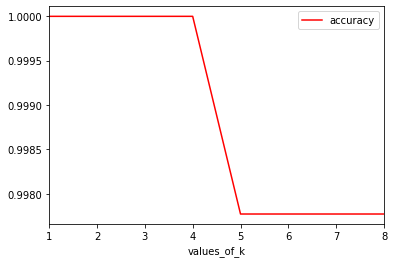

predicted lis= [101, 101, 101, 101, 101, 101, 112, 112, 101, 101, 101, 101, 112, 112, 112, 112, 101, 112, 101, 101, 112, 101, 101, 101, 112, 112, 101, 101, 112, 101, 112, 101, 112, 101, 101, 101, 101, 101, 112, 101, 101, 101, 112, 112, 112, 101, 112, 101, 112, 112, 101, 112, 112, 101, 112, 101, 112, 112, 101, 112, 101, 112, 112, 101, 101, 101, 112, 101, 112, 112, 101, 112, 112, 112, 101, 112, 101, 101, 101, 112, 112, 112, 101, 101, 101, 101, 112, 101, 101, 101, 101, 101, 112, 112, 112, 101, 112, 112, 101, 101, 112, 101, 101, 101, 112, 101, 112, 101, 112, 101, 112, 112, 101, 101, 101, 112, 101, 112, 112, 101, 101, 101, 112, 101, 112, 112, 112, 112, 101, 101, 112, 101, 101, 101, 101, 101, 112, 101, 101, 112, 112, 112, 101, 112, 112, 112, 101, 112, 112, 101, 112, 101, 101, 101, 112, 101, 112, 112, 112, 101, 101, 112, 101, 101, 112, 101, 112, 112, 101, 101, 101, 112, 101, 112, 101, 101, 112, 101, 112, 112, 101, 101, 112, 112, 112, 112, 101, 101, 101, 112, 112, 112, 101, 112, 112, 112, 112,

In [2]:

knn_classifier = KNNClassifier()
knn_classifier.train('train.csv')
predictions = knn_classifier.predict('test.csv')
test_labels = list()
with open("test_labels.csv") as f:
  for line in f:
    test_labels.append(line.strip())
print ('final accuracy socre=',accuracy_score(test_labels, predictions))

# Now lets make the same model using sklearn


### load the data

In [0]:
data=pd.read_csv('train.csv')
data



,e,k,s,n,f,n.1,a,c,b,y,e.1,?,s.1,s.2,o,o.1,p,n.2,o.2,p.1,b.1,c.1,l
0,e,k,s,g,f,n,f,w,b,p,e,?,s,s,w,w,p,w,t,p,w,s,g
1,e,b,s,g,f,n,f,w,b,w,e,?,s,s,w,w,p,w,t,p,w,s,g
2,e,s,f,g,f,n,f,c,n,n,e,e,s,s,w,w,p,w,o,p,n,v,u
3,e,f,f,g,f,n,f,w,b,p,t,e,s,f,w,w,p,w,o,e,n,a,g
4,e,x,s,n,f,n,f,w,b,h,t,e,s,f,w,w,p,w,o,e,k,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4490,p,x,y,y,f,f,f,c,b,p,e,b,k,k,n,n,p,w,o,l,h,y,g
4491,p,f,y,e,f,y,f,c,n,b,t,?,k,k,p,w,p,w,o,e,w,v,d
4492,p,x,y,g,f,f,f,c,b,h,e,b,k,k,p,p,p,w,o,l,h,y,p
4493,p,x,y,e,f,f,f,c,n,b,t,?,s,s,w,p,p,w,o,e,w,v,d


### Convert the data frame to ascii

In [0]:
for column in data:
			data[column]=data[column].apply(ord)

### Process the data

In [0]:

y=data['e']
X=data.drop(['e','?'],axis=1)

### import all necessery libary

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

### do the train and validation split

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=4)

### Now predict k

In [0]:

dic11={'k':[],'accuracy_score':[]}
dic={}
print(X_train.shape)
for k in range(1,9):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  dic[k]=accuracy_score(y_test,y_pred)
  dic11['accuracy_score'].append(accuracy_score(y_test,y_pred))
  dic11['k'].append(k)
print(dic)
liss1=list(dic.values())
liss2=list(dic.keys())
best_k=liss2[liss1.index(max(liss1))]
  

(4045, 21)
{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 0.9977777777777778, 6: 0.9977777777777778, 7: 0.9977777777777778, 8: 0.9977777777777778}


### Print best k

In [0]:
best_k

1

### Now lets plot the k vs accuracy graph

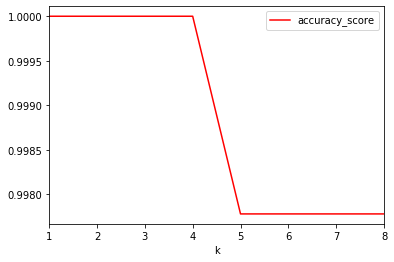

In [0]:
%matplotlib inline
p=pd.DataFrame.from_dict(dic11)
p.plot(x='k',y='accuracy_score',color='red')
plt.show()

## Now lets predict the test data and find accuracy score by knn from sklearn with best k

### load the test data

In [0]:
test=pd.read_csv('test.csv',header=None)
test


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,x,y,n,t,n,f,c,b,w,t,b,s,s,w,w,p,w,o,p,n,y,d
1,b,y,y,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
2,f,y,g,t,n,f,c,b,n,t,b,s,s,g,p,p,w,o,p,n,y,d
3,f,s,g,f,n,f,w,b,n,t,e,f,f,w,w,p,w,o,e,k,s,g
4,x,s,y,t,l,f,c,b,g,e,c,s,s,w,w,p,w,o,p,n,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,x,s,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,n,v,u
996,f,f,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,k,a,g
997,x,f,g,f,n,f,w,b,h,t,e,s,s,w,w,p,w,o,e,k,s,g
998,f,y,n,t,n,f,c,b,n,t,b,s,s,p,w,p,w,o,p,k,y,d


### process the test data

In [0]:
test=test.drop(test.columns[10], axis=1)
test
for column in test:
			test[column]=test[column].apply(ord)
    

### run knn on  the test data

In [0]:

predictions=knn.predict(test)


### Accuracy score using sklearn

In [0]:
test_labels = list()
with open("test_labels.csv") as f:
  for line in f:
    test_labels.append(line.strip())
t=[]
for i in predictions:
  t.append(chr(i))
print (accuracy_score(test_labels, t))

0.999


# Conclusion

The best k and accuracy_score I get from sklearn are same as my original algorithm's best k and accuracy_score